In [9]:
#Importing the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Setting the path to the data set
train_path = "dataset/TRAIN" 
test_path = "dataset/TEST"

In [3]:
#Necessary libraries from package tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [6]:
#Data visualization
x_data = []
y_data = []
for category in glob(train_path+"/*"):
    for file in tqdm(glob(category+"/*")):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image':x_data,"label":y_data})
 
print(data.shape)

100%|██████████| 9999/9999 [00:13<00:00, 716.84it/s]


(22564, 2)


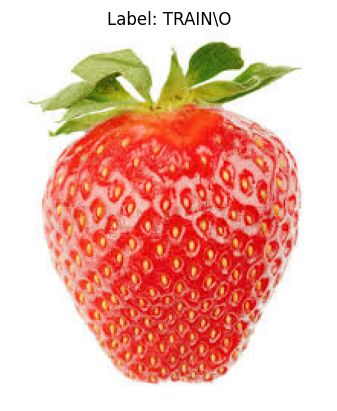

In [23]:
#Display of single image
plt.imshow(data['image'][0])
plt.title(f"Label: {data['label'][0]}")
plt.axis('off')
plt.show()


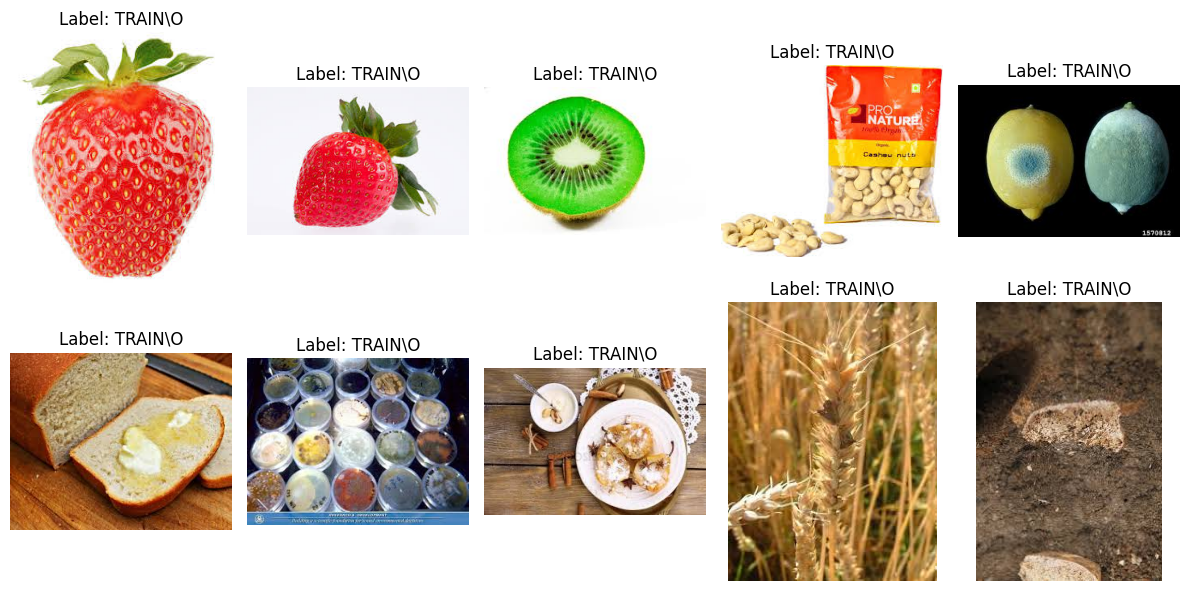

In [24]:
#Display of the images in grid
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(data['image'][i])
    ax.set_title(f"Label: {data['label'][i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()


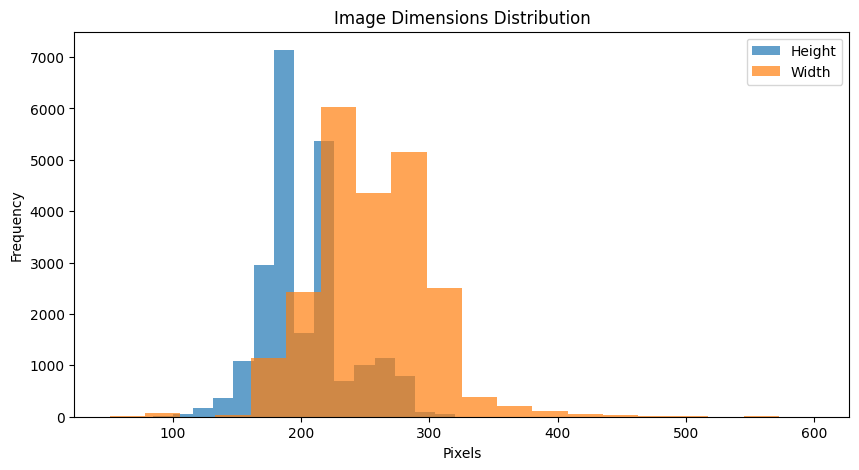

In [ ]:
#Image size Distribution in pixels using histogram
plt.figure(figsize=(10, 5))
plt.hist(data['image_height'], bins=20, alpha=0.7, label='Height')
plt.hist(data['image_width'], bins=20, alpha=0.7, label='Width')
plt.legend()
plt.title("Image Dimensions Distribution")
plt.xlabel("Pixels")
plt.ylabel("Frequency")
plt.show()


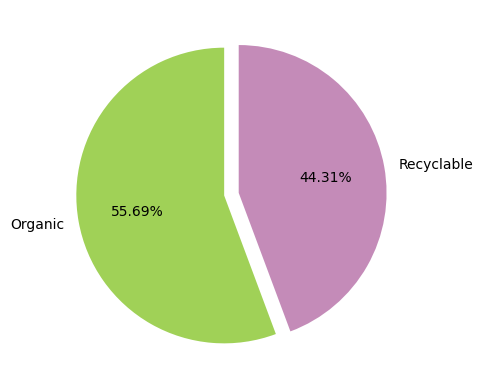

In [ ]:
#To understand the proportion of the data
colors = ["#a0d157", "#c48bb8"]
plt.pie(data.label.value_counts(), labels = ["Organic","Recyclable"], autopct = '%0.2f%%', colors = colors, startangle = 90, explode = [0.05, 0.05] ) #explode is optional
plt.show()

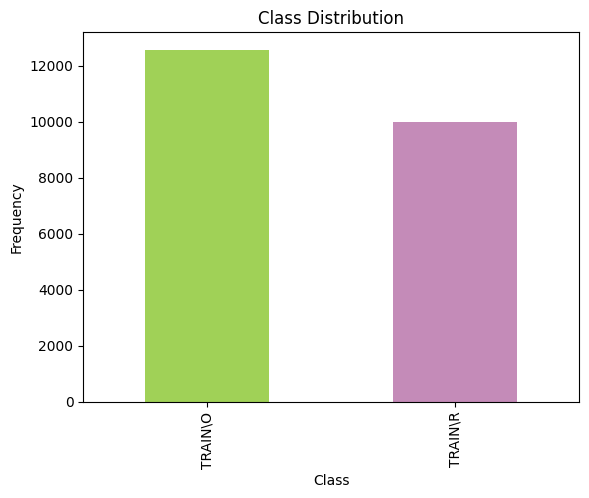

In [28]:
#Bar chat for showing the proportion
data['label'].value_counts().plot(kind='bar', color=['#a0d157', '#c48bb8'])
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

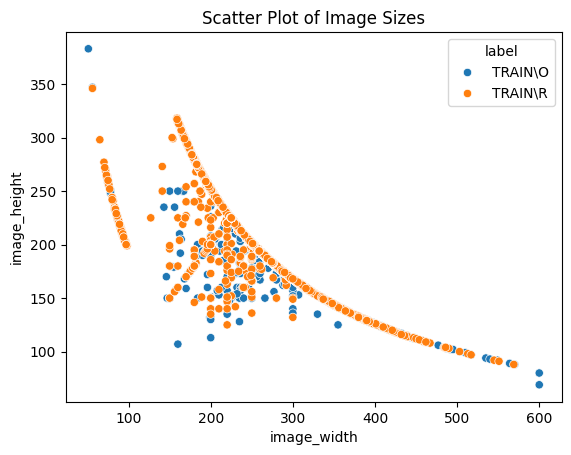

In [ ]:
#Scatter Plot for the width and height of the images
sns.scatterplot(x='image_width', y='image_height', data=data, hue='label')
plt.title("Scatter Plot of Image Sizes")
plt.show()
